In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import VotingRegressor
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder 
# from sklearn.compose import make_column_transformer, make_column_selector

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Wisconsin\BreastCancer.csv', index_col=0)
df.head()


,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [4]:
df.Class.value_counts()

X = df.drop(columns=['Class'], axis=1)
y = df['Class']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [7]:
rf = RandomForestClassifier(n_estimators=10, random_state=24)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=24)

In [8]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [11]:
y_pred_proaba = rf.predict_proba(X_test)[:, 1]
print("RocAUc score: ", roc_auc_score(y_test, y_pred_proaba))

RocAUc score:  0.9938607085346216


In [15]:
rf.feature_importances_

array([0.06664773, 0.40563819, 0.10911166, 0.06246314, 0.03894598,
       0.05480866, 0.2359423 , 0.02485275, 0.00158958])

In [26]:

df_imp = pd.DataFrame({
    'features': list(rf.feature_names_in_),
    'importance': rf.feature_importances_
})


In [27]:
df_imp.sort_values('importance', inplace=True)
df_imp

,features,importance
8,Mitoses,0.001590
7,NoemN,0.024853
4,SEpith,0.038946
5,BareN,0.054809
3,MargAdh,0.062463
0,Clump,0.066648
2,Uni_CellShape,0.109112
6,BChromatin,0.235942
1,UniCell_Size,0.405638


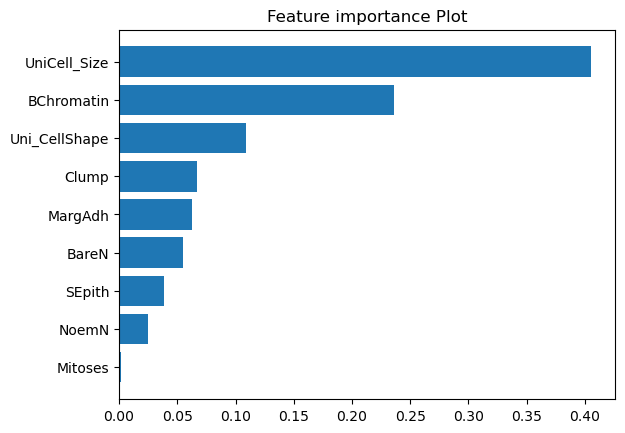

In [28]:
#we see the feature importance of more cols has increased when compared to the plot of single tree
plt.barh(df_imp['features'], df_imp['importance'])
plt.title('Feature importance Plot')
plt.show() 

From the plot of Decision Tree Classifier

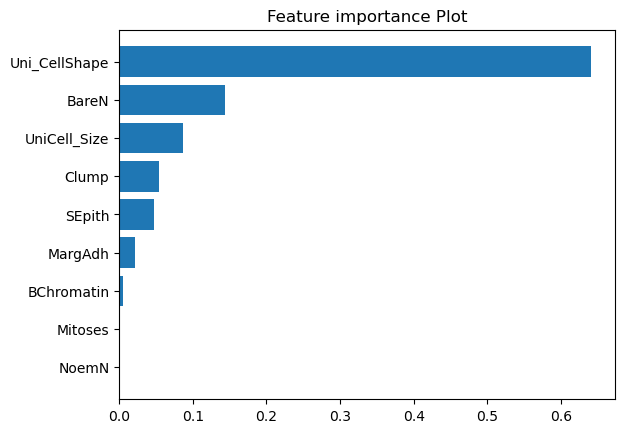